# Análise exploratória de dados

In [540]:
# Importando as dependências
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [541]:
# Carregando os dados brutos
base_cadastral = pd.read_csv("../data/raw/base_cadastral.csv",  sep=";")
base_info = pd.read_csv("../data/raw/base_info.csv", sep=";")
base_pagamentos_desenvolvimento = pd.read_csv("../data/raw/base_pagamentos_desenvolvimento.csv", sep=";")
base_pagamentos_teste = pd.read_csv("../data/raw/base_pagamentos_teste.csv", sep=";")

### Visualizando os dados e entendendo os dados

In [542]:
base_cadastral

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62
...,...,...,...,...,...,...,...,...
1310,3431426889924624821,2020-08-13,92,NaN,Serviços,HOTMAIL,MEDIO,69
1311,5288503299611498087,2020-11-03,NaN,NaN,Comércio,YAHOO,PEQUENO,13
1312,957773253650890560,2021-07-05,NaN,NaN,Comércio,GMAIL,MEDIO,20
1313,6094038865287329652,2021-07-05,NaN,NaN,Serviços,GMAIL,GRANDE,48


In [543]:
base_info

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0
...,...,...,...,...
24396,705648002974742140,2021-12,278663.0,105.0
24397,4993499380140734678,2021-12,156968.0,140.0
24398,4614484019183480654,2021-12,292698.0,121.0
24399,1299146298565441811,2021-12,106180.0,121.0


In [544]:
base_pagamentos_desenvolvimento

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99
...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99


In [545]:
base_pagamentos_teste

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99
...,...,...,...,...,...,...
12270,705648002974742140,2021-11,2021-11-25,2021-12-13,47010.00,6.99
12271,4993499380140734678,2021-11,2021-11-25,2021-12-13,122875.35,8.99
12272,4614484019183480654,2021-11,2021-11-26,2028-09-30,302200.00,5.99
12273,1299146298565441811,2021-11,2021-11-26,2021-12-13,143791.85,5.99


### Exploração inicial das bases individualmente

In [546]:
# Funções auxiliares 

# Aplica uma análise básica e geral a uma base de dados
def faz_analise_basica(df, nome):
    resumo = {
        "nome": nome,
        "shape": df.shape,
        "tipos_de_dados": df.dtypes.to_dict(),
        "valores_nulos": df.isnull().sum().to_dict(),
        "valores_unicos": df.nunique().to_dict(),
        "exemplo_valores": df.head(3).to_dict(orient="records"),
        "descricao": df.describe(include="all").to_dict(),
    }
    return resumo


# Imprime gráficos e tabelas para a análise básica
def plot_analises(analise):
    
    nome = analise['nome']
    print(f"\nAnalisando: {nome}")

    # Informações das dimensões da base de dados
    print(f"Dimensões: {analise['shape']}")
        
    # Converter dicionários em DataFrames para visualização
    df_nulos = pd.DataFrame.from_dict(analise['valores_nulos'], orient='index', columns=['valores_nulos'])
    df_unicos = pd.DataFrame.from_dict(analise['valores_unicos'], orient='index', columns=['valores_unicos'])
    df_dtypes = pd.DataFrame.from_dict({k: str(v) for k, v in analise['tipos_de_dados'].items()}, orient='index', columns=['tipo_de_dado'])

    # Juntar em um único DataFrame para exibir em tabela (se quiser)
    df_info = df_dtypes.join([df_nulos, df_unicos])

    # Gráfico de valores nulos
    plt.figure(figsize=(10, 4))
    df_nulos.sort_values('valores_nulos', ascending=False).plot(kind='bar', legend=False, color='salmon')
    plt.title(f'{nome}: Valores Nulos por Coluna')
    plt.ylabel('Qtd de valores nulos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Gráfico de valores únicos
    plt.figure(figsize=(10, 4))
    df_unicos.sort_values('valores_unicos', ascending=False).plot(kind='bar', legend=False, color='skyblue')
    plt.title(f'{nome}: Valores Únicos por Coluna')
    plt.ylabel('Qtd de valores únicos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Tabela com tipos de dados, nulos e únicos
    print(f'\n Informações de tipo, valores únicos e valores nulos: \n')
    display(df_info)
    
    # Imprimir descrição mais ciompleta sobre cada atributo
    print(f'\n Descrição completa sobre todas as colunas \n')
    df_descricao = pd.DataFrame(analise['descricao'])
    display(df_descricao)


#### Análise base_cadastral:

- **ID_CLIENTE**: Identificador único do cliente.  
- **DATA_CADASTRO**: Data da realização do cadastro no sistema. 
- **DDD**: Número do DDD do telefone do cliente.  
- **FLAG_PF**: Indica se o cliente é uma pessoa física (‘X’) ou jurídica (‘NaN’). 
- **SEGMENTO_INDUSTRIAL**: Indica a qual segmento da indústria pertence o 
cliente.  
- **DOMINIO_EMAIL**: Indica o domínio(ou provedor) do email utilizado para o 
cadastro.  
- **PORTE**: Indica o porte (tamanho) da empresa.  
- **CEP_2_DIG**: Indica os dois primeiros números do CEP do endereço 
cadastrado. 


Analisando: base_cadastral
Dimensões: (1315, 8)


<Figure size 1000x400 with 0 Axes>

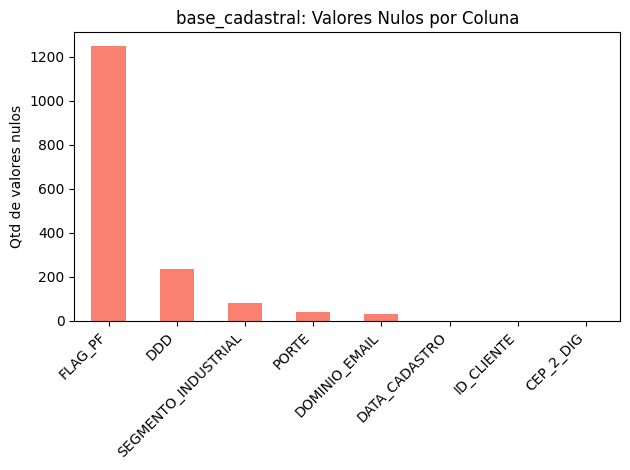

<Figure size 1000x400 with 0 Axes>

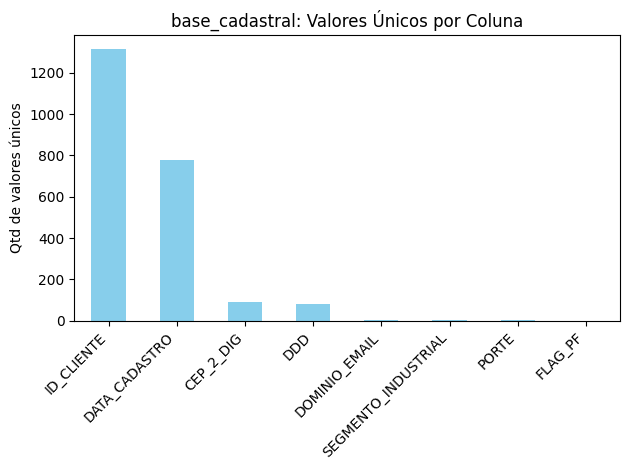


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1315
DATA_CADASTRO,object,0,777
DDD,object,237,79
FLAG_PF,object,1249,1
SEGMENTO_INDUSTRIAL,object,83,3
DOMINIO_EMAIL,object,30,6
PORTE,object,41,3
CEP_2_DIG,object,0,90



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
count,1.315000e+03,1315,1078,66,1232,1285,1274,1315
unique,NaN,777,79,1,3,6,3,90
top,NaN,2000-08-15,11,X,Serviços,YAHOO,MEDIO,13
freq,NaN,162,125,66,503,392,522,86
mean,4.637945e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.667894e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.784237e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.307709e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.714188e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.973809e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [547]:
analise_basica_base_cadastral = faz_analise_basica(base_cadastral, "base_cadastral")
plot_analises(analise_basica_base_cadastral)

##### Analises específicas de base_cadastral

Procurando duplicatas em base_cadastral

In [548]:
base_cadastral.duplicated().sum()

np.int64(0)

Distribuição e cardinalidade de **PORTE** 

<Axes: >

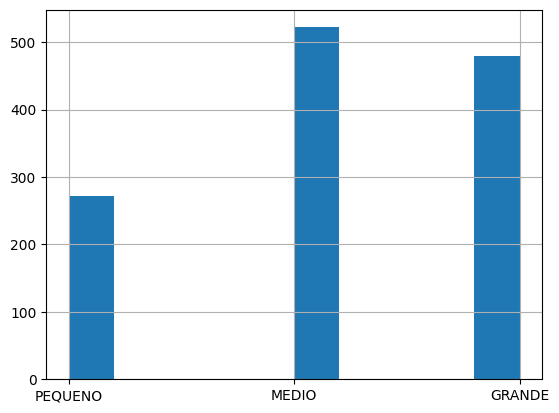

In [549]:
base_cadastral['PORTE'].hist()

Aplicando tratamento na coluna FLAG_PF para melhor categorizar pessoa física e jurídica, em que 1 = Pessoa Física e 0 = Pessoa Jurídica

In [550]:
base_cadastral['FLAG_PF'] = np.where(base_cadastral['FLAG_PF']=='X', 1, 0)

n_zeros = (base_cadastral['FLAG_PF'] == 0).sum()
n_uns   = (base_cadastral['FLAG_PF'] == 1).sum()

n_zeros, n_uns

(np.int64(1249), np.int64(66))

Cardinalidade de **DDD**. **DDD** possui uma cardinalidade alta, acima de 50

In [551]:
base_cadastral['DDD'].dropna().nunique()

79

Distribuição de **DDD**. Pecebe-se novamente a grande quantidade de valores nulos. Nota-se também que há muitas categorias com erros

- Os DDDs no Brasil vão de 11 a 99: há valores como '00', '02', '04', '06', '07'
- Há valores com símbolos indicando possíveis erros de digitação como (6, (2


Os dados desta coluna não parecem confiáveis, coluna sujeita a eliminação

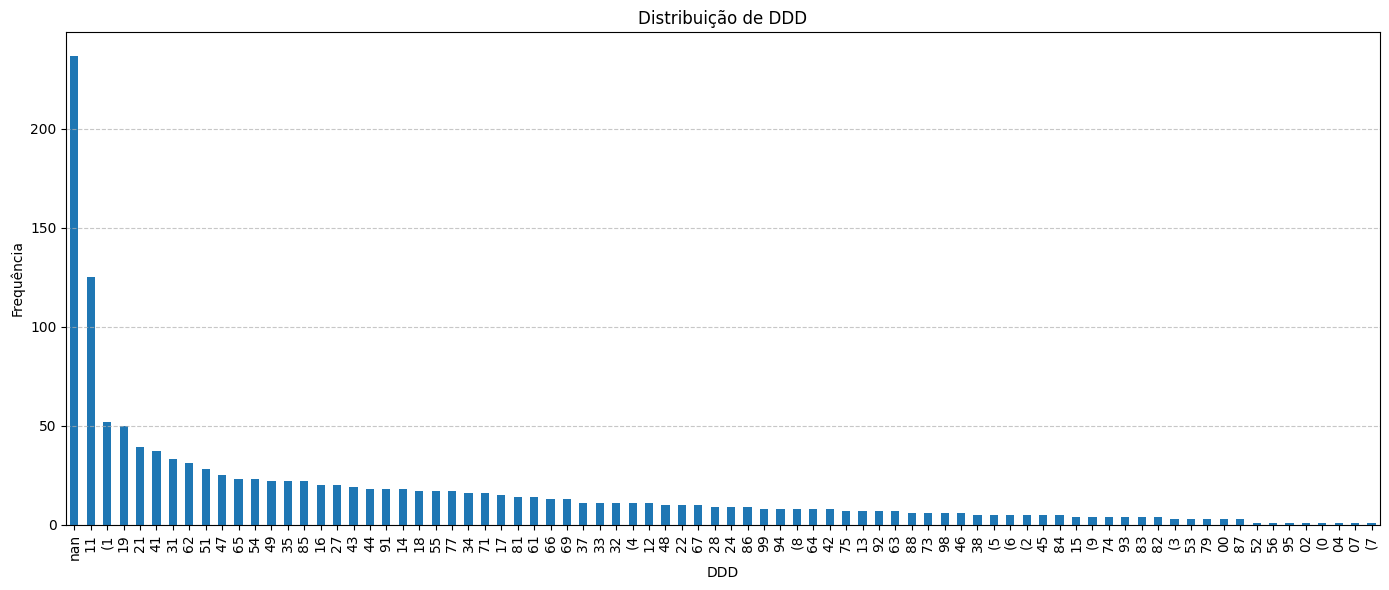

In [552]:
ddd_counts = base_cadastral['DDD'].astype(str).value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(14, 6))
ddd_counts.plot(kind='bar')
plt.title('Distribuição de DDD')
plt.xlabel('DDD')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cardinalidade de **CEP_2_DIG**. Como visto a seguir, **CEP_2_DIG** também possui alta cardinalidade. Será necessário atenção no tratamento desta variável antes de passá-la pelo modelo

In [553]:
base_cadastral['CEP_2_DIG'].dropna().nunique()

90

Distribuição de **CEP_2_DIG**

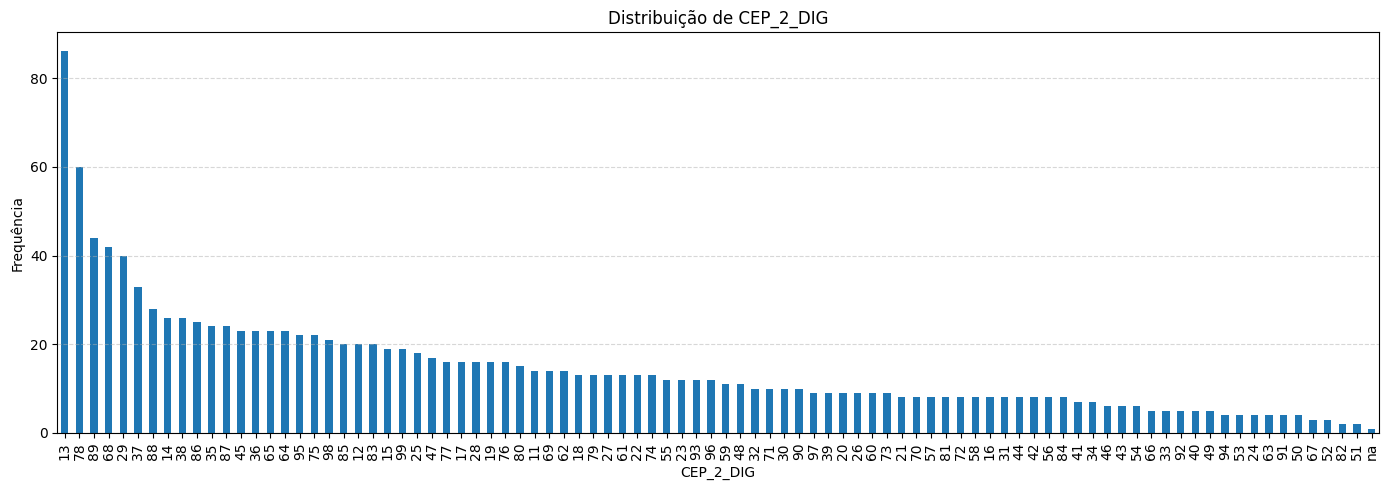

In [554]:
# Garante que os valores sejam tratados como string (útil para exibição correta no eixo X)
cep_counts = base_cadastral['CEP_2_DIG'].astype(str).value_counts()

# Plotando
plt.figure(figsize=(14, 5))
cep_counts.plot(kind='bar')
plt.title('Distribuição de CEP_2_DIG')
plt.xlabel('CEP_2_DIG')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Todos os dígitos de CEP representam valores válidos exceto 'na', que aparenta ser um erro. Esse erro será tratado posteriormente com a junção da base.

In [555]:
base_cadastral['CEP_2_DIG'].unique()

array(['65', '77', '48', '89', '62', '19', '38', '26', '55', '87', '37',
       '22', '13', '18', '21', '98', '14', '60', '82', '92', '79', '12',
       '27', '76', '67', '72', '68', '11', '84', '70', '83', '88', '75',
       '36', '45', '44', '16', '42', '78', '31', '41', '35', '51', '30',
       '86', '25', '29', '17', '23', '20', '93', '64', '95', '85', '15',
       '99', '80', '24', '61', '90', '50', '96', '97', '57', '46', '47',
       '32', '54', '91', '56', '28', '71', '33', '94', '58', '34', '59',
       '69', '74', '40', '49', '43', '66', '39', '73', '81', '53', '52',
       '63', 'na'], dtype=object)

In [556]:
base_cadastral[base_cadastral['CEP_2_DIG']=='na']

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
934,3903290047715748290,2019-10-07,NaN,0,Indústria,HOTMAIL,PEQUENO,na


**DDD** é uma variável geográfica, assim como **CEP_2_DIG**. Mas diferente de **DDD**, **CEP_2_DIG** não possui nenhum valor faltante e nem tantas inconsistências (como acabamos de ver na análise de **DDD**). A coluna **DDD** será eliminada, pois os dois primeiros dígitos do CEP indicam a região postal e geralmente coincide com a área de abrangência de um **DDD**.

In [557]:
base_cadastral = base_cadastral.drop('DDD', axis=1)

Verificando se há email de domínio coorporativo. Pode haver uma relação 
entre domínio coorporativo e adimplência. Mas todos esses domínios são públicos


In [558]:
base_cadastral['DOMINIO_EMAIL'].value_counts()

DOMINIO_EMAIL
YAHOO      392
GMAIL      390
HOTMAIL    323
AOL         74
OUTLOOK     72
BOL         34
Name: count, dtype: int64

A relação entre o **DOMINIO_EMAIL** e a variável target será analisada mais adiante, após a construção da variável alvo e a junção das tabelas. Por enquanto, observa-se que todos os domínios presentes são públicos. Apesar de ser possível que domínios corporativos apresentassem algum padrão diferente de inadimplência, isso não se aplica neste caso, já que não há registros com esse tipo de domínio.

In [559]:
#base_cadastral = base_cadastral.drop('DOMINIO_EMAIL', axis=1)

Convertendo **DATA_CADASTRO** para o tipo mais adequado, pois observou na tabela de tipos acima que essa variável é do tipo object.

In [560]:
base_cadastral['DATA_CADASTRO'] = pd.to_datetime(base_cadastral['DATA_CADASTRO'])

As colunas **SEGMENTO_INDUSTRIAL** e **PORTE** têm valores faltantes. Quando a base de dados for mesclada, será analisada a eliminação das linhas em que esses valores estiverem ausentes. Para eliminar esses registros pretende-se que os valores nulos não ultrapassem 5% do total de registros e que preferencialmente esses registros sejam eliminados da classe com mais amostras (que certamente será q classe de adimplentes). Abaixo a quantidade de nulos para essa base específica:

In [561]:
print(
    f"Quantidade valores nulos para a coluna SEGMENTO_INDUSTRIAL e PORTE, respectivamente: {base_cadastral['SEGMENTO_INDUSTRIAL'].isnull().sum()} e {base_cadastral['PORTE'].isnull().sum()}"
)

Quantidade valores nulos para a coluna SEGMENTO_INDUSTRIAL e PORTE, respectivamente: 83 e 41


##### Resumo análise individual base_cadastral:

- Muitos registros vazios em **FLAG_PF**. Esses registros vazios, como visto no enunciado do case, indicam os clientes pessoa jurídica. Realizado o tratamento para melhor categorizar quem é pessoa física e quem é pessoa jurídica.
- **DDD** é uma variável geográfica, assim como **CEP_2_DIG**. Mas diferente de **DDD**, **CEP_2_DIG** não possui nenhum valor faltante. **DDD** será eliminada, pois os dois primeiros dígitos do CEP indicam a região posta e geralmente coincide com a área de abrangência de um **DDD**.
- A relação entre o **DOMINIO_EMAIL** e a variável target será analisada mais adiante, após a construção da variável alvo e a junção das tabelas. Por enquanto, observa-se que todos os domínios presentes são públicos. Apesar de ser possível que domínios corporativos apresentassem algum padrão diferente de inadimplência, isso não se aplica neste caso, já que não há registros com esse tipo de domínio.
- **CEP_2_DIG** pode influenciar na inadimplência. É uma variável geográfica e condições socioecômicas variam bastante pelo Brasil e condições socieconômicas influenciam na inadimplência. Essa correlação de dever ser avaliada com a variável TARGET.
- O tratamento dos valores nulos das seguintes colunas: **SEGMENTO_INDUSTRIAL** (moda), **PORTE** (moda) será analisado quando as tabelas estiverem mescladas.
- **ID_CLIENTE**: será usado para o merge das tabelas e depois será removido.
- Nenhuma duplicata encontrada.

#### Análise base_info:

- **ID_CLIENTE**: Identificador único do cliente 
- **SAFRA_REF**: Mês de referência da amostra 
- **RENDA_MES_ANTERIOR**: Renda ou faturamento declarado pelo cliente no 
fim do mês anterior 
- **NO_FUNCIONARIOS**: Número de funcionários reportado pelo cliente no 
fim do mês anterior


Analisando: base_cadastral
Dimensões: (24401, 4)


<Figure size 1000x400 with 0 Axes>

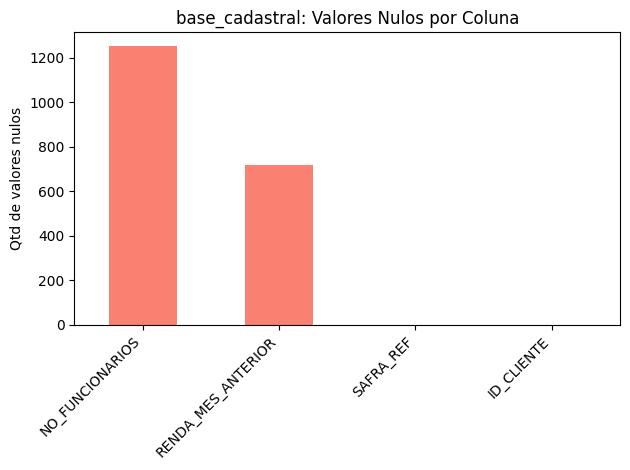

<Figure size 1000x400 with 0 Axes>

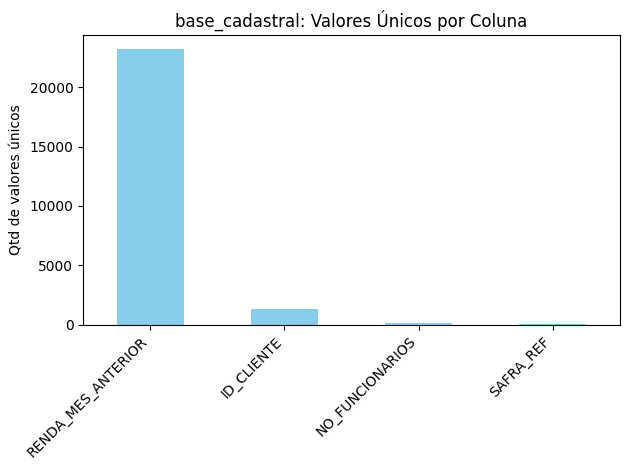


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1336
SAFRA_REF,object,0,40
RENDA_MES_ANTERIOR,float64,717,23196
NO_FUNCIONARIOS,float64,1252,128



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
count,2.440100e+04,24401,2.368400e+04,23149.000000
unique,NaN,40,NaN,NaN
top,NaN,2021-09,NaN,NaN
freq,NaN,717,NaN,NaN
mean,4.668214e+18,NaN,2.887514e+05,117.799646
std,2.669294e+18,NaN,2.115948e+05,21.464574
min,8.784237e+15,NaN,1.050000e+02,0.000000
25%,2.347029e+18,NaN,1.338662e+05,106.000000
50%,4.795153e+18,NaN,2.409985e+05,118.000000
75%,7.061869e+18,NaN,3.925018e+05,131.000000


In [562]:
analise_basica_base_info = faz_analise_basica(base_info, "base_cadastral")
plot_analises(analise_basica_base_info)

##### Análises específicas base_info:

Como visto anteriormente na tabela de tipos, **NO_FUNCIONARIOS** está como coluna do tipo float. Trata-se de valores discretos, convertendo para o int.

In [563]:
base_info['NO_FUNCIONARIOS'] = base_info['NO_FUNCIONARIOS'].astype('Int64')  

Buscando duplicatas

In [564]:
base_info.duplicated().sum()

np.int64(0)

Conversão de **SAFRA_REF** para datetime, agrupando por **ID_CLIENTE** e ordenando os agrupamentos pela safra

In [565]:
base_info['SAFRA_REF'] = pd.to_datetime(base_info['SAFRA_REF'], format='%Y-%m')

base_info = base_info.groupby('ID_CLIENTE').apply(
    lambda x: x.sort_values('SAFRA_REF')
).reset_index(drop=True)

base_info

/tmp/ipykernel_13149/1675336263.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  base_info = base_info.groupby('ID_CLIENTE').apply(


,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,8784237149961904,2018-09-01,300502.0,107
1,8784237149961904,2018-10-01,499238.0,98
2,8784237149961904,2018-11-01,256117.0,104
3,8784237149961904,2018-12-01,433897.0,105
4,8784237149961904,2019-01-01,370549.0,112
...,...,...,...,...
24396,9206030810342980458,2021-08-01,175291.0,101
24397,9206030810342980458,2021-09-01,535348.0,108
24398,9206030810342980458,2021-10-01,32400.0,101
24399,9206030810342980458,2021-11-01,856312.0,107


Para tratar valores nulos na variável **RENDA_MES_ANTERIOR**, observa-se que ela possui uma clara característica temporal, com isso temos que os valores anteriores e posteriores no tempo podem ser utilizados para estimar os valores ausentes. A imagem a seguir mostra a evolução dessa variável ao longo do tempo para algumas amostras de clientes, com o objetivo de avaliar a eficácia da interpolação linear como estratégia de imputação. Por exemplo, o caso do Cliente 5611787644735474299, onde dois pontos ausentes foram preenchidos com base nessa interpolação. Os valores estimados seguem coerentemente a tendência da série temporal. A análise de diversas amostras selecionadas aleatoriamente indica que a interpolação linear é uma abordagem viável para um número significativo de registros na base de dados.

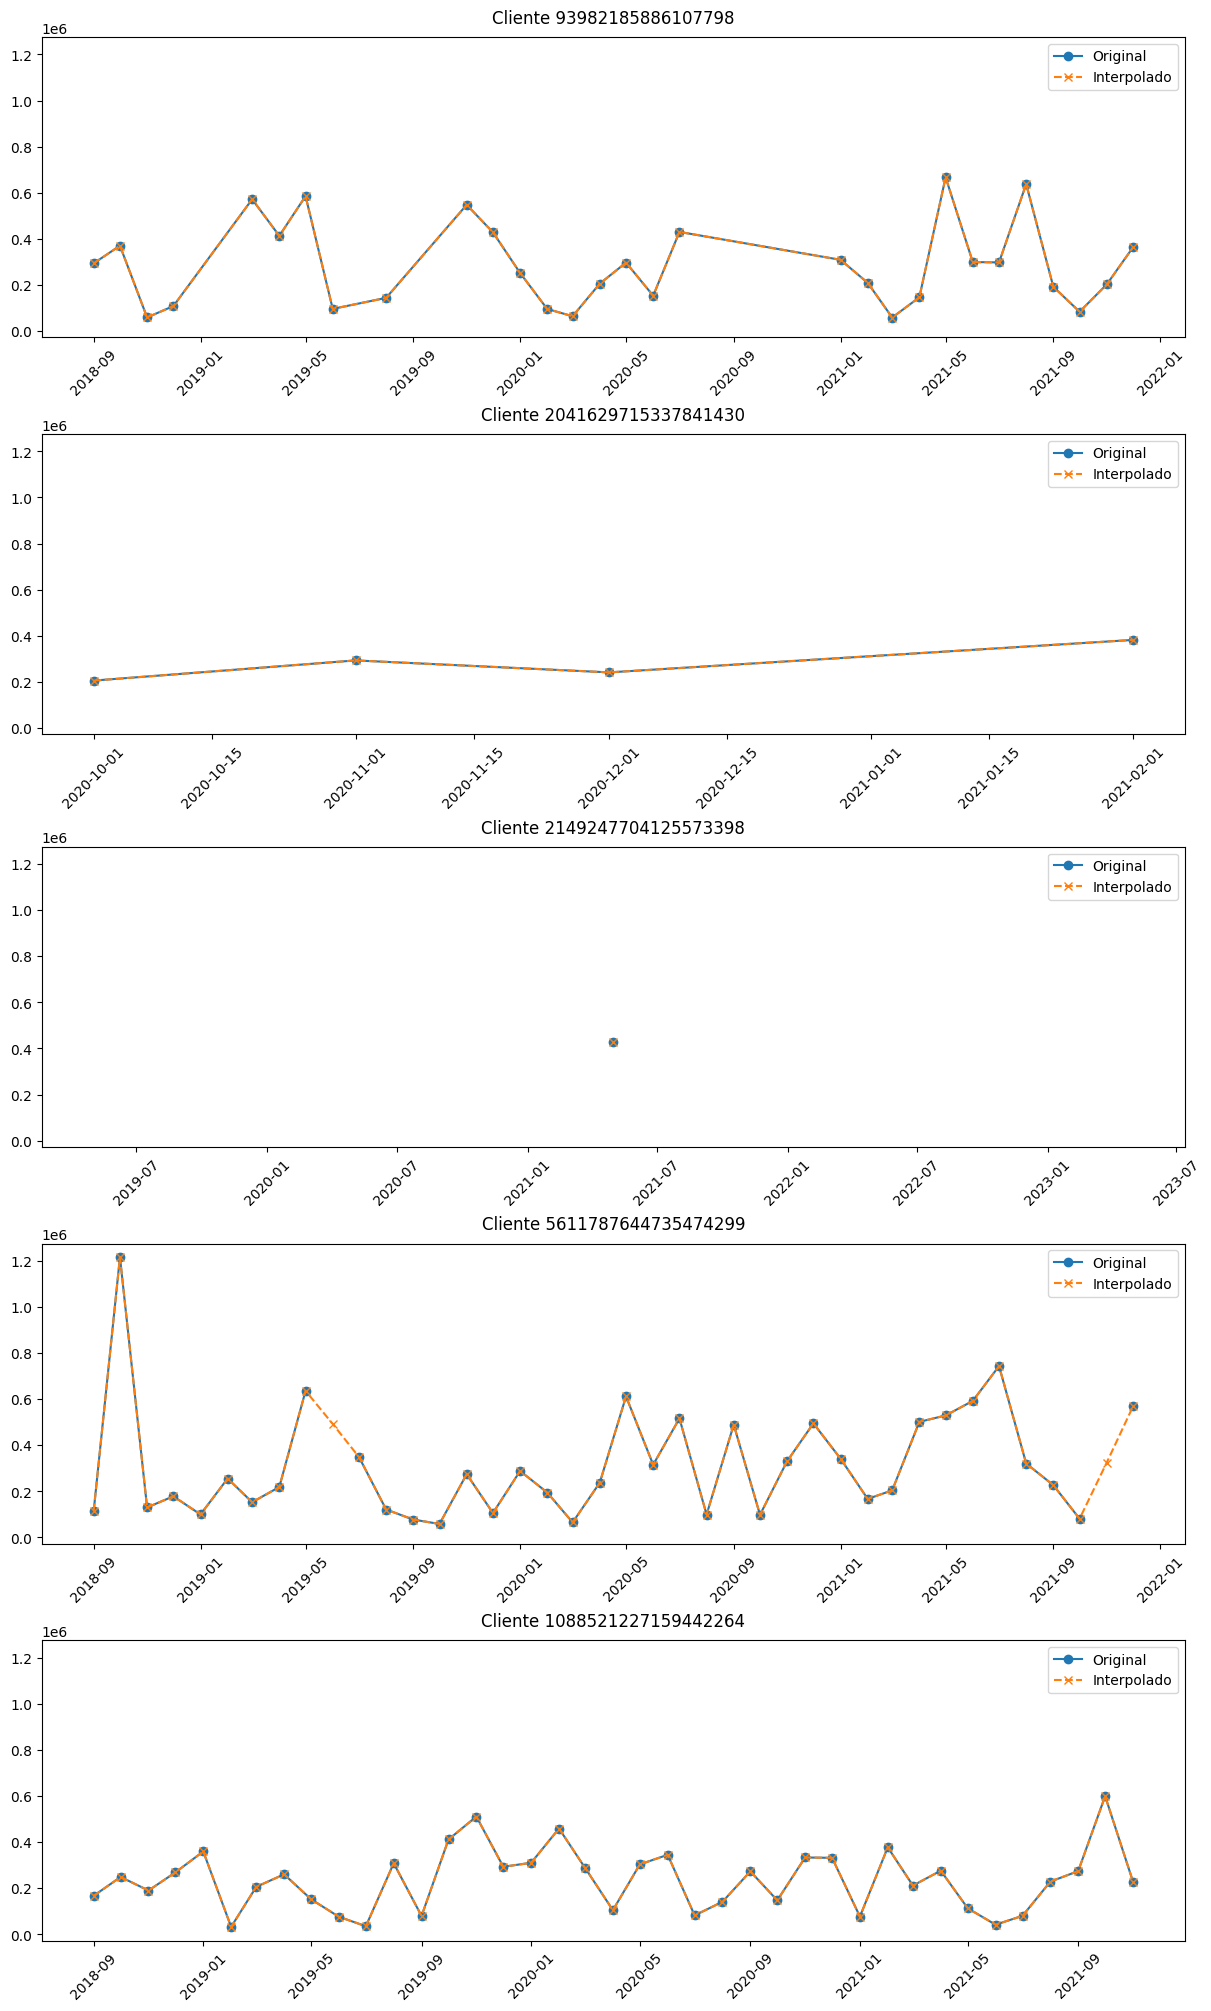

In [566]:
# Pega 5 clientes únicos aleatórios
N = 5
sample_clients = (
    base_info['ID_CLIENTE']
    .drop_duplicates()
    .sample(n=N, random_state=100)
    .tolist()
)

# Filtra só esses clientes
df_sample = base_info[base_info['ID_CLIENTE'].isin(sample_clients)]

# Cria um subplot para cada cliente, sem compartilhar eixo x
fig, axes = plt.subplots(N, 1, figsize=(12, 4*N), sharex=False, sharey=True, constrained_layout=True)

# Garante que axes seja iterável mesmo se N = 1
if N == 1:
    axes = [axes]

for ax, cliente in zip(axes, sample_clients):
    dfc = df_sample[df_sample['ID_CLIENTE'] == cliente].sort_values('SAFRA_REF')
    
    # Plot original
    ax.plot(dfc['SAFRA_REF'], 
            dfc['RENDA_MES_ANTERIOR'], 
            marker='o', 
            label='Original')
    
    # Plot interpolado
    ax.plot(dfc['SAFRA_REF'], 
            dfc['RENDA_MES_ANTERIOR'].interpolate(), 
            marker='x', 
            linestyle='--', 
            label='Interpolado')
    
    ax.set_title(f'Cliente {cliente}', pad=10)
    ax.legend()
    ax.tick_params(axis='x', labelrotation=45)

plt.show()



A linha laranja acompanha de perto os pontos azuis, o que indica que a interpolação linear conseguiu capturar a variação dos dados de forma coerente. Aplicando a interpolação linear para **RENDA_MES_ANTERIOR**

In [567]:
base_info['RENDA_MES_ANTERIOR'] = (
    base_info
    .groupby('ID_CLIENTE')['RENDA_MES_ANTERIOR']
    .transform(lambda x: x.interpolate(method='linear'))
)

Verificando vazios que ainda podem existir, esse método não funciona nas bordas, como o gráfico da figura anterior mostrou.

In [568]:
base_info['RENDA_MES_ANTERIOR'].isnull().sum()

np.int64(35)

Aplicando o método backwark fill e forward fill para as extremidades em que a interpolação linear não abrange. Sempre a aplicando ao grupo de registro do cliente para valores mais precisos.

In [569]:
base_info['RENDA_MES_ANTERIOR'] = (
    base_info
    .groupby('ID_CLIENTE')['RENDA_MES_ANTERIOR']
    .transform(lambda x: x.ffill().bfill())
)

Verificando vazios em **RENDA_MES_ANTERIOR**

In [570]:
base_info['RENDA_MES_ANTERIOR'].isnull().sum()

np.int64(2)

Como se pode ver pela análise a seguir, os casos restantes com valores faltantes acontece quando há 
um único registro para o cliente. Mais pra frente, a deleção desses valores vai ser avaliada 

In [571]:
base_info[base_info['RENDA_MES_ANTERIOR'].isnull()]

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
17221,6597470754117210299,2021-06-01,NaN,<NA>
23547,8835646476961190471,2021-09-01,NaN,143


A variável **NO_FUNCIONARIOS** possui muitos valores ausentes e representa um dado discreto. Como o número de funcionários costuma se manter estável ao longo do tempo, foi aplicada inicialmente a interpolação linear dentro de cada cliente para estimar os valores faltantes. Para os casos em que a interpolação não foi suficiente, como nas extremidades da série temporal, foi utilizado o preenchimento com forward fill e backward fill para completar os dados de forma mais coerente.

In [572]:
# Interpolação + ffill + bfill para valores discretos
base_info['NO_FUNCIONARIOS'] = (
    base_info
    .groupby('ID_CLIENTE')['NO_FUNCIONARIOS']
    .transform(lambda x: x.interpolate(method='linear').ffill().bfill().round().astype('Int64'))
)


Verificando se ainda há valores vazios em **NO_FUNCIONARIOS**

In [573]:
base_info['NO_FUNCIONARIOS'].isna().sum()

np.int64(11)

In [574]:
base_info

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,8784237149961904,2018-09-01,300502.0,107
1,8784237149961904,2018-10-01,499238.0,98
2,8784237149961904,2018-11-01,256117.0,104
3,8784237149961904,2018-12-01,433897.0,105
4,8784237149961904,2019-01-01,370549.0,112
...,...,...,...,...
24396,9206030810342980458,2021-08-01,175291.0,101
24397,9206030810342980458,2021-09-01,535348.0,108
24398,9206030810342980458,2021-10-01,32400.0,101
24399,9206030810342980458,2021-11-01,856312.0,107


##### Resumo análise individual base_info:
- **SAFRA_REF**: conversão para datetime do pandas, agrupando registros por **ID_CLIENTE** e ordenando esses registros por **SAFRA_REF**.
- **RENDA_MES_ANTERIOR**: tratamento de vazios com interpolação linear pois trata-se de uma série temporaral, tentar estimar os valores a partir dos valores anteriores e posteriores é uma boa estratégia neste caso. Os valores das "bordas" foram preenchidos usando a técnica de backward fill e forward fill. 11 casos são casos únicos em que não é possível estimar os valores por cliente. Além disso, esses casos específicos não possuem valores em **NO_FUNCIONARIOS**. Sendo assim, são bons candidatos a deleção.
- A variável **NO_FUNCIONARIOS** possui muitos valores ausentes e representa um dado discreto. Como o número de funcionários costuma se manter estável ao longo do tempo, foi aplicada inicialmente a interpolação linear dentro de cada cliente para estimar os valores faltantes. Para os casos em que a interpolação não foi suficiente, como nas extremidades da série temporal, foi utilizado o preenchimento com forward fill e backward fill para completar os dados de forma mais coerente. Não foi possível aplicar essa técnica em 11 casos. A deleção desses registros será analisada.
- Nenhuma duplicata encontrada


#### Análise base_pagamentos_desenvolvimento:

- **ID_CLIENTE**: Identificador único do cliente 
- **SAFRA_REF**: Mês de referência da amostra 
- **DATA_EMISSAO_DOCUMENTO**: Data da emissão da nota de crédito 
- **DATA_VENCIMENTO**: Data limite para pagamento do empréstimo 
- **VALOR_A_PAGAR**: Valor da nota de crédito 
- **TAXA**: Taxa de juros cobrada no empréstimo 
- **DATA_PAGAMENTO**: Data em que o cliente realizou o pagamento da nota 


Analisando: base_cadastral
Dimensões: (77414, 7)


<Figure size 1000x400 with 0 Axes>

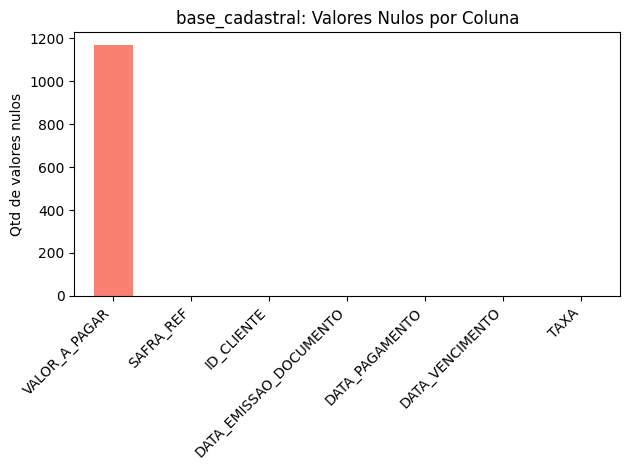

<Figure size 1000x400 with 0 Axes>

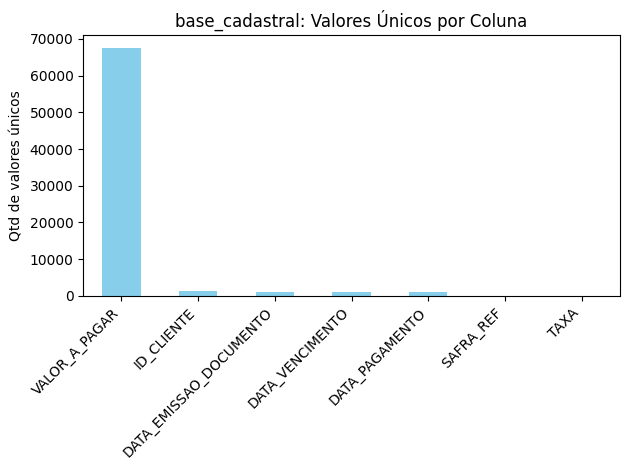


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1248
SAFRA_REF,object,0,35
DATA_EMISSAO_DOCUMENTO,object,0,1040
DATA_PAGAMENTO,object,0,921
DATA_VENCIMENTO,object,0,955
VALOR_A_PAGAR,float64,1170,67588
TAXA,float64,0,5



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
count,7.741400e+04,77414,77414,77414,77414,7.624400e+04,77414.000000
unique,NaN,35,1040,921,955,NaN,NaN
top,NaN,2021-05,2021-05-16,2021-02-17,2019-03-06,NaN,NaN
freq,NaN,2531,207,315,357,NaN,NaN
mean,4.662270e+18,NaN,NaN,NaN,NaN,4.659078e+04,6.789623
std,2.665719e+18,NaN,NaN,NaN,NaN,4.643393e+04,1.798225
min,8.784237e+15,NaN,NaN,NaN,NaN,1.000000e-01,4.990000
25%,2.369365e+18,NaN,NaN,NaN,NaN,1.876536e+04,5.990000
50%,4.817817e+18,NaN,NaN,NaN,NaN,3.475869e+04,5.990000
75%,6.969349e+18,NaN,NaN,NaN,NaN,6.093384e+04,6.990000


In [575]:
analise_basica_pagamentos_desenvolvimento = faz_analise_basica(base_pagamentos_desenvolvimento, "base_cadastral")
plot_analises(analise_basica_pagamentos_desenvolvimento)

Buscando duplicatas

In [576]:
base_pagamentos_desenvolvimento.duplicated().sum()

np.int64(1)

Visualizando as duplicatas 

In [577]:
base_pagamentos_desenvolvimento[base_pagamentos_desenvolvimento.duplicated(keep=False)]


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
32322,3218226066162129945,2019-11,2019-11-07,2019-11-25,2019-11-25,NaN,6.99
32323,3218226066162129945,2019-11,2019-11-07,2019-11-25,2019-11-25,NaN,6.99


Deletando um dos registros duplicados 

In [578]:
base_pagamentos_desenvolvimento = base_pagamentos_desenvolvimento.drop_duplicates(keep='first')

Verificando se registros duplicados foram removidos

In [579]:
base_pagamentos_desenvolvimento[base_pagamentos_desenvolvimento.duplicated(keep=False)]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA


Conversao de datas para datetime, pois a partir das informações de tipos desta tabela notou-se que as datas estão como tipo object

In [580]:
base_pagamentos_desenvolvimento = base_pagamentos_desenvolvimento.copy()

base_pagamentos_desenvolvimento['SAFRA_REF'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['SAFRA_REF'], format='%Y-%m', errors='raise'

)

base_pagamentos_desenvolvimento['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['DATA_EMISSAO_DOCUMENTO'], format='%Y-%m-%d',errors='raise'

)

base_pagamentos_desenvolvimento['DATA_PAGAMENTO'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['DATA_PAGAMENTO'], format='%Y-%m-%d', errors='raise'

)

base_pagamentos_desenvolvimento['DATA_VENCIMENTO'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['DATA_VENCIMENTO'], format='%Y-%m-%d', errors='raise'

)

base_pagamentos_desenvolvimento.dtypes

ID_CLIENTE                         int64
SAFRA_REF                 datetime64[ns]
DATA_EMISSAO_DOCUMENTO    datetime64[ns]
DATA_PAGAMENTO            datetime64[ns]
DATA_VENCIMENTO           datetime64[ns]
VALOR_A_PAGAR                    float64
TAXA                             float64
dtype: object

In [581]:
base_pagamentos_desenvolvimento

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08-01,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08-01,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08-01,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08-01,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08-01,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99
...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06-01,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99
77410,5220206408301580591,2021-06-01,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99
77411,5860276371789140450,2021-06-01,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99
77412,2814790209436551216,2021-06-01,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99


##### Resumo análise individual base_pagamentos_desenvolvimento:
- **VALOR_A_PAGAR**: a decisão de como tratar esses valores será feita na base mesclada.
- Registro duplicado foi removido
- Conversão de colunas de datas para datetime

#### Análise básica de base_pagamentos_teste:

- **ID_CLIENTE**: Identificador único do cliente 
- **SAFRA_REF**: Mês de referência da amostra 
- **DATA_EMISSAO_DOCUMENTO**: Data da emissão da nota de crédito 
- **DATA_VENCIMENTO**: Data limite para pagamento do empréstimo 
- **VALOR_A_PAGAR**: Valor da nota de crédito 
- **TAXA**: Taxa de juros cobrada no empréstimo 


Analisando: base_pagamentos_teste
Dimensões: (12275, 6)


<Figure size 1000x400 with 0 Axes>

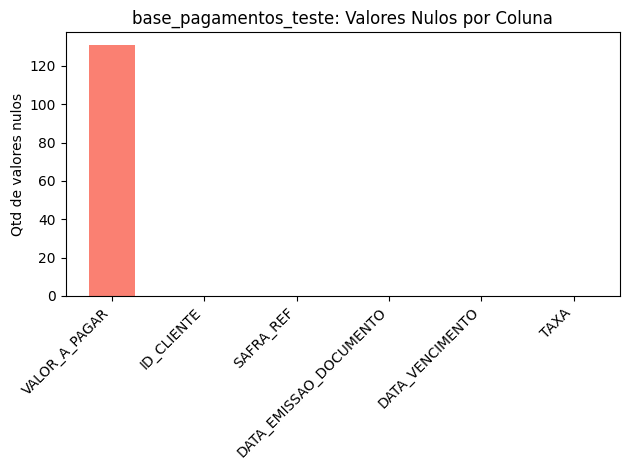

<Figure size 1000x400 with 0 Axes>

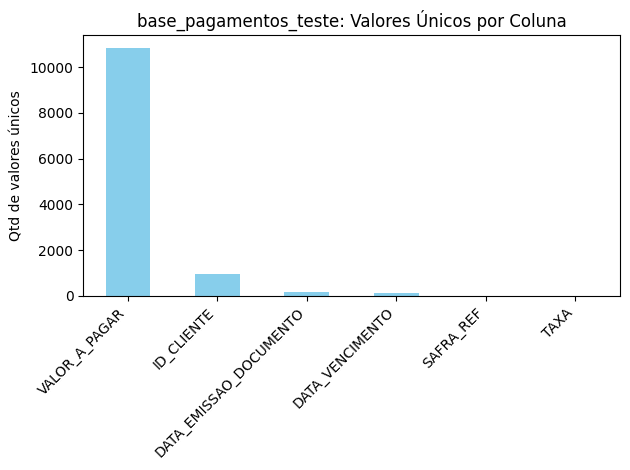


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,976
SAFRA_REF,object,0,5
DATA_EMISSAO_DOCUMENTO,object,0,150
DATA_VENCIMENTO,object,0,141
VALOR_A_PAGAR,float64,131,10850
TAXA,float64,0,5



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
count,1.227500e+04,12275,12275,12275,12144.000000,12275.000000
unique,NaN,5,150,141,NaN,NaN
top,NaN,2021-10,2021-11-04,2021-09-06,NaN,NaN
freq,NaN,2673,177,293,NaN,NaN
mean,4.670820e+18,NaN,NaN,NaN,65883.258575,6.807271
std,2.667868e+18,NaN,NaN,NaN,55919.404970,1.835351
min,8.784237e+15,NaN,NaN,NaN,6.900000,4.990000
25%,2.308217e+18,NaN,NaN,NaN,26712.335000,5.990000
50%,4.850936e+18,NaN,NaN,NaN,49665.210000,5.990000
75%,6.964109e+18,NaN,NaN,NaN,87029.362500,6.990000


In [582]:
analise_basica_base_pagamentos_tesete = faz_analise_basica(base_pagamentos_teste, "base_pagamentos_teste")
plot_analises(analise_basica_base_pagamentos_tesete)

Buscando duplicatas 

In [583]:
base_pagamentos_teste[base_pagamentos_teste.duplicated(keep=False)]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
985,3931892303497206092,2021-07,2021-07-05,2021-07-23,21448.53,6.99
986,3931892303497206092,2021-07,2021-07-05,2021-07-23,21448.53,6.99
4044,1156053485989336481,2021-08,2021-08-22,2021-09-14,30048.51,6.99
4045,1156053485989336481,2021-08,2021-08-22,2021-09-14,30048.51,6.99
4620,314309872114206760,2021-09,2021-09-12,2021-10-27,20296.00,4.99
4621,314309872114206760,2021-09,2021-09-12,2021-10-27,20296.00,4.99
6191,5301988619224057921,2021-09,2021-09-13,2021-10-01,21456.70,6.99
6192,5301988619224057921,2021-09,2021-09-13,2021-10-01,21456.70,6.99
6482,7120090169052575663,2021-09,2021-09-13,2021-09-30,29083.10,11.99
6483,7120090169052575663,2021-09,2021-09-13,2021-09-30,29083.10,11.99


Removendo registros duplicados 

In [584]:
base_pagamentos_teste = base_pagamentos_teste.drop_duplicates(keep='first')

Verificando se as duplicatas foram resolvidas

In [585]:
base_pagamentos_teste.duplicated().sum()    

np.int64(0)

Conversão de colunas de datas para datetime do pandas

In [586]:
base_pagamentos_teste

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99
...,...,...,...,...,...,...
12270,705648002974742140,2021-11,2021-11-25,2021-12-13,47010.00,6.99
12271,4993499380140734678,2021-11,2021-11-25,2021-12-13,122875.35,8.99
12272,4614484019183480654,2021-11,2021-11-26,2028-09-30,302200.00,5.99
12273,1299146298565441811,2021-11,2021-11-26,2021-12-13,143791.85,5.99


In [587]:
base_pagamentos_teste = base_pagamentos_teste.copy()

base_pagamentos_teste['SAFRA_REF'] = pd.to_datetime(
    base_pagamentos_teste['SAFRA_REF'], format='%Y-%m'
)

base_pagamentos_teste['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(
    base_pagamentos_teste['DATA_EMISSAO_DOCUMENTO'], format='%Y-%m-%d'
)

base_pagamentos_teste['DATA_VENCIMENTO'] = pd.to_datetime(
    base_pagamentos_teste['DATA_VENCIMENTO'], format='%Y-%m-%d'
)

base_pagamentos_teste.dtypes

ID_CLIENTE                         int64
SAFRA_REF                 datetime64[ns]
DATA_EMISSAO_DOCUMENTO    datetime64[ns]
DATA_VENCIMENTO           datetime64[ns]
VALOR_A_PAGAR                    float64
TAXA                             float64
dtype: object

##### Resumo análise individual base_pagamentos_teste:
- **VALOR_A_PAGAR**: a decisão de como tratar esses valores será feita na base mesclada
- Registros duplicados foram resolvidos (somente o primeiro foi mantido)
- Conversão de colunas de datas para datetime

### Exploração das bases conjuntamente

#### Análise base_pagamentos_desenvolvimento X base_pagamentos_teste:

Buscando por clientes que estão na base de dados de teste mas não estão na base de dados de desenvolvimento (desafio na inferência: inferência com dados faltantes)

In [588]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_test = set(base_pagamentos_teste       ['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_teste = ids_test  - ids_dev

# IDs que estão em desenvolvimento, mas não em teste
ids_so_dev   = ids_dev   - ids_test

print(f"Em base_pagamentos_teste e não em base_pagamentos_desenvolvimento: {len(ids_so_teste)} clientes")
print(f"Em base_pagamentos_desenvolvimento e não em base_pagamentos_teste: {len(ids_so_dev)} clientes")
print(f"Total clientes base_pagamentos_desenvolvimento: {len(ids_dev)}")
print(f"Total clientes em base_pagamentos_teste: {len(ids_test)}")


Em base_pagamentos_teste e não em base_pagamentos_desenvolvimento: 88 clientes
Em base_pagamentos_desenvolvimento e não em base_pagamentos_teste: 360 clientes
Total clientes base_pagamentos_desenvolvimento: 1248
Total clientes em base_pagamentos_teste: 976


#### Análise base_pagamentos_desenvolvimento X base_cadastral:

In [589]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_cad = set(base_cadastral['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_dev = ids_dev  - ids_cad
print(f"Em base_pagamentos_desenvolvimento e não em base_cadastral: {len(ids_so_dev)} clientes")

Em base_pagamentos_desenvolvimento e não em base_cadastral: 0 clientes


#### Análise base_pagamentos_desenvolvimento X base_info:

In [590]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_info = set(base_info['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_dev = ids_dev  - ids_info
print(f"Em base_pagamentos_desenvolvimento e não em base_info: {len(ids_so_dev)} clientes")

Em base_pagamentos_desenvolvimento e não em base_info: 0 clientes


#### Análise base_pagamentos_desenvolvimento X base_info X base_cadastral:

Realizando o merge das três bases de dados

In [591]:
dev_info = pd.merge(
    base_pagamentos_desenvolvimento,
    base_info,
    on=['ID_CLIENTE', 'SAFRA_REF'],
    how='left' # mantém todos os registros de base_pagamentos_desenvolvimento
)

dev_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77413 entries, 0 to 77412
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              77413 non-null  int64         
 1   SAFRA_REF               77413 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  77413 non-null  datetime64[ns]
 3   DATA_PAGAMENTO          77413 non-null  datetime64[ns]
 4   DATA_VENCIMENTO         77413 non-null  datetime64[ns]
 5   VALOR_A_PAGAR           76244 non-null  float64       
 6   TAXA                    77413 non-null  float64       
 7   RENDA_MES_ANTERIOR      73476 non-null  float64       
 8   NO_FUNCIONARIOS         73475 non-null  Int64         
dtypes: Int64(1), datetime64[ns](4), float64(3), int64(1)
memory usage: 5.4 MB


In [592]:
merged_dataset = pd.merge(
    dev_info,
    base_cadastral,
    on=['ID_CLIENTE'],
    how='left' 
)

merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77413 entries, 0 to 77412
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              77413 non-null  int64         
 1   SAFRA_REF               77413 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  77413 non-null  datetime64[ns]
 3   DATA_PAGAMENTO          77413 non-null  datetime64[ns]
 4   DATA_VENCIMENTO         77413 non-null  datetime64[ns]
 5   VALOR_A_PAGAR           76244 non-null  float64       
 6   TAXA                    77413 non-null  float64       
 7   RENDA_MES_ANTERIOR      73476 non-null  float64       
 8   NO_FUNCIONARIOS         73475 non-null  Int64         
 9   DATA_CADASTRO           77413 non-null  datetime64[ns]
 10  FLAG_PF                 77413 non-null  int64         
 11  SEGMENTO_INDUSTRIAL     75996 non-null  object        
 12  DOMINIO_EMAIL           76515 non-null  object

In [593]:
merged_dataset

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08-01,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08-01,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08-01,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08-01,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08-01,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77408,2951563549197799278,2021-06-01,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161,2000-08-15,0,Comércio,AOL,PEQUENO,13
77409,5220206408301580591,2021-06-01,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87,2021-04-08,0,Indústria,GMAIL,GRANDE,25
77410,5860276371789140450,2021-06-01,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122,2011-02-15,0,Serviços,HOTMAIL,GRANDE,67
77411,2814790209436551216,2021-06-01,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,<NA>,2021-05-13,0,Serviços,YAHOO,MEDIO,14


Construção da variável target, pois saber se as classes estão desbalanceadas é fundamental antes de decidir sobre deletar um registro ou não. Bases de problemas de inadimplência tendem a ter mais adimplentes que inadimplentes.

In [594]:
merged_dataset['DIAS_ATRASO'] = (merged_dataset['DATA_PAGAMENTO'] - merged_dataset['DATA_VENCIMENTO']).dt.days

In [595]:
merged_dataset['TARGET_INADIMPLENCIA'] = (merged_dataset['DIAS_ATRASO'] >= 5).astype(int)

Proporção de inadimplentes:

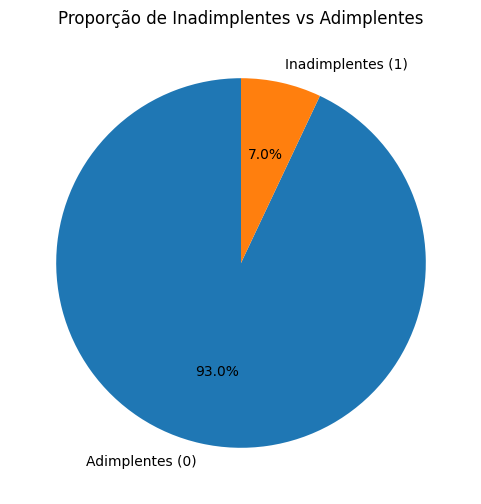

In [596]:
prop = merged_dataset['TARGET_INADIMPLENCIA'].value_counts(normalize=True)

# Plota gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    prop,
    labels=['Adimplentes (0)', 'Inadimplentes (1)'],
    autopct='%1.1f%%',
    startangle=90
)
ax.set_title('Proporção de Inadimplentes vs Adimplentes')
plt.show()

In [597]:
merged_dataset.isnull().sum()

ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1169
TAXA                         0
RENDA_MES_ANTERIOR        3937
NO_FUNCIONARIOS           3938
DATA_CADASTRO                0
FLAG_PF                      0
SEGMENTO_INDUSTRIAL       1417
DOMINIO_EMAIL              898
PORTE                     2476
CEP_2_DIG                    0
DIAS_ATRASO                  0
TARGET_INADIMPLENCIA         0
dtype: int64

Verificando os valores vazios do dataset mesclado 

In [598]:
merged_dataset.isnull().sum()

ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1169
TAXA                         0
RENDA_MES_ANTERIOR        3937
NO_FUNCIONARIOS           3938
DATA_CADASTRO                0
FLAG_PF                      0
SEGMENTO_INDUSTRIAL       1417
DOMINIO_EMAIL              898
PORTE                     2476
CEP_2_DIG                    0
DIAS_ATRASO                  0
TARGET_INADIMPLENCIA         0
dtype: int64

Verificando a correlação entre domínio de e-mail e a variável target. Mostando quais domínios de e-mail têm maior proporção de inadimplentes.

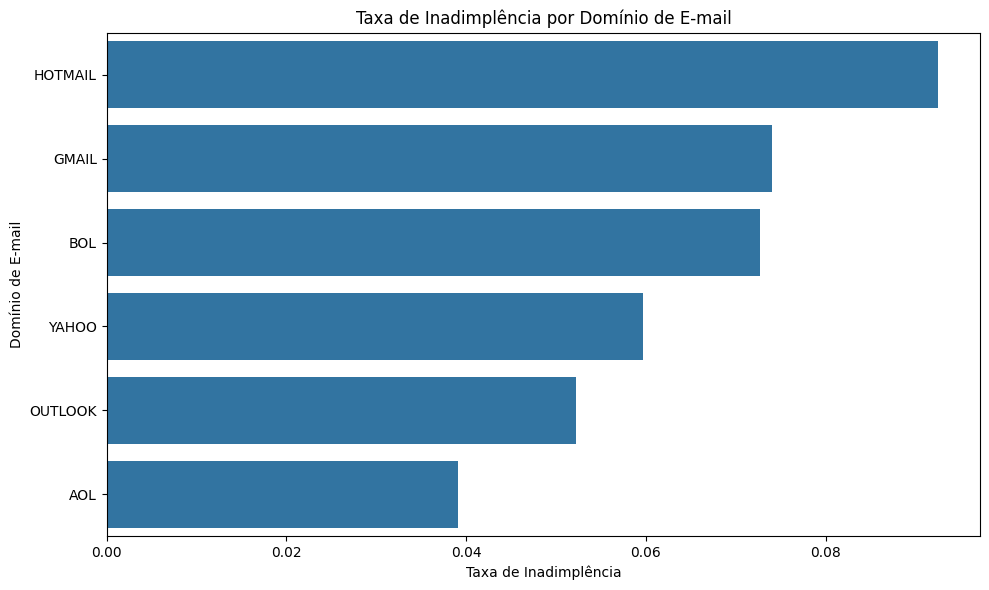

In [599]:
taxa_inadimplencia = (
    merged_dataset
    .groupby('DOMINIO_EMAIL')['TARGET_INADIMPLENCIA']
    .mean()
    .reset_index()
    .sort_values('TARGET_INADIMPLENCIA', ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=taxa_inadimplencia, x='TARGET_INADIMPLENCIA', y='DOMINIO_EMAIL')
plt.xlabel('Taxa de Inadimplência')
plt.ylabel('Domínio de E-mail')
plt.title('Taxa de Inadimplência por Domínio de E-mail')
plt.tight_layout()
plt.show()

A análise do domínio de e-mail mostra variações relevantes na taxa de inadimplência entre os usuários. O domínio **HOTMAIL** apresenta a maior taxa (9,26%) entre os principais provedores, seguido por **GMAIL** (7,4%) e **BOL** (7,3%). Já os domínios **YAHOO**, **OUTLOOK** e **AOL** apresentam taxas progressivamente menores, sendo a menor observada em **AOL** (3,9%). Como todas essas categorias possuem uma quantidade significativa de registros, a variável **DOMINIO_EMAIL** pode contribuir com valor preditivo e merece ser considerada no modelo, desde que tratada adequadamente.


In [600]:
# Agrupamento por domínio de e-mail
analise_dominios = (
    merged_dataset
    .groupby('DOMINIO_EMAIL')
    .agg(
        qtde_usuarios=('TARGET_INADIMPLENCIA', 'count'),
        taxa_inadimplencia=('TARGET_INADIMPLENCIA', 'mean')
    )
    .sort_values('taxa_inadimplencia', ascending=False)
)

# Exibindo o resultado
print(analise_dominios)


               qtde_usuarios  taxa_inadimplencia
DOMINIO_EMAIL                                   
HOTMAIL                18680            0.092559
GMAIL                  21407            0.074041
BOL                     1842            0.072747
YAHOO                  25322            0.059632
OUTLOOK                 4808            0.052205
AOL                     4456            0.039048


Visando evitar overfitting já que essa categoria está bem desbalanceada, **BOL**, **OUTLOOK**, **AOL** e valores vazios serão agrupados como **OUTROS**.

In [601]:
# Define domínios principais
dominios_principais = ['HOTMAIL', 'GMAIL', 'YAHOO']

# Substitui NaN por 'OUTROS' primeiro
merged_dataset['DOMINIO_EMAIL'] = merged_dataset['DOMINIO_EMAIL'].fillna('OUTROS')

# Agrupa domínios menos frequentes em 'OUTROS'
merged_dataset['DOMINIO_EMAIL'] = merged_dataset['DOMINIO_EMAIL'].apply(
    lambda x: x if x in dominios_principais else 'OUTROS'
)

In [602]:
merged_dataset

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIAS_ATRASO,TARGET_INADIMPLENCIA
0,1661240395903230676,2018-08-01,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65,0,0
1,1661240395903230676,2018-08-01,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65,1,0
2,1661240395903230676,2018-08-01,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65,1,0
3,1661240395903230676,2018-08-01,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65,6,1
4,1661240395903230676,2018-08-01,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,<NA>,2013-08-22,0,Serviços,YAHOO,PEQUENO,65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77408,2951563549197799278,2021-06-01,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161,2000-08-15,0,Comércio,OUTROS,PEQUENO,13,0,0
77409,5220206408301580591,2021-06-01,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87,2021-04-08,0,Indústria,GMAIL,GRANDE,25,0,0
77410,5860276371789140450,2021-06-01,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122,2011-02-15,0,Serviços,HOTMAIL,GRANDE,67,0,0
77411,2814790209436551216,2021-06-01,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,<NA>,2021-05-13,0,Serviços,YAHOO,MEDIO,14,0,0


Cardinalidade e distribuição de **TAXA**. Será se não podemos fazer desta variável uma variável categórica?

In [603]:
merged_dataset['TAXA'].nunique()

5

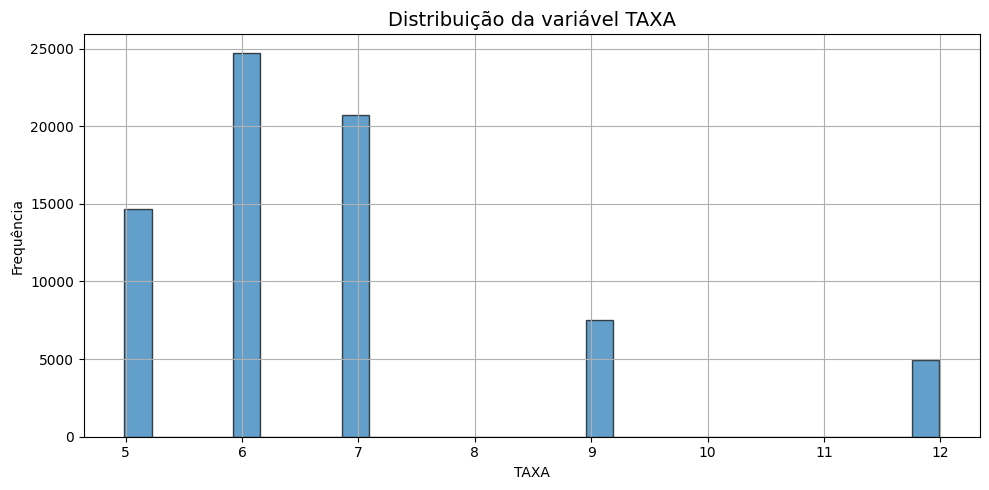

In [ ]:
# Plot do histograma
plt.figure(figsize=(10, 5))
plt.hist(merged_dataset['TAXA'], bins=30, edgecolor='black', alpha=0.7)

# Títulos e rótulos
plt.title('Distribuição da variável TAXA', fontsize=14)
plt.xlabel('TAXA')
plt.ylabel('Frequência')

plt.grid(True)
plt.tight_layout()
plt.show()

Analisando como a **TAXA** influencia na inadimplência. A análise mostra que a inadimplência apresenta uma leve tendência de aumento conforme a taxa cresce, especialmente após o valor de 5.99, embora esse efeito se estabilize em torno de 7.5% nas taxas mais altas. Isso sugere uma relação positiva, porém não linear, entre TAXA e o risco de inadimplência. Dessa forma, a variável pode ser útil como preditora.

In [605]:
# Garantir que não tenha nulos
df_temp = merged_dataset[['TAXA', 'TARGET_INADIMPLENCIA']].dropna()

# Taxa média de inadimplência por valor de TAXA
inadimplencia_por_taxa = (
    df_temp
    .groupby('TAXA')['TARGET_INADIMPLENCIA']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'taxa_inadimplencia', 'count': 'quantidade'})
)

print(inadimplencia_por_taxa)


    TAXA  taxa_inadimplencia  quantidade
0   4.99            0.069923       15703
1   5.99            0.063683       26459
2   6.99            0.074796       22020
3   8.99            0.076254        7934
4  11.99            0.075703        5297


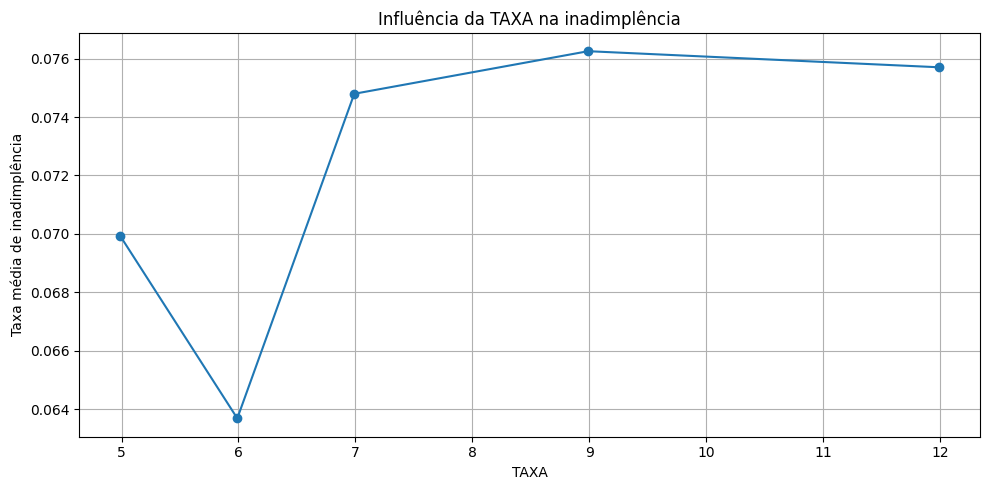

In [608]:
plt.figure(figsize=(10, 5))
plt.plot(inadimplencia_por_taxa['TAXA'], inadimplencia_por_taxa['taxa_inadimplencia'], marker='o')
plt.title('Influência da TAXA na inadimplência')
plt.xlabel('TAXA')
plt.ylabel('Taxa média de inadimplência')
plt.grid(True)
plt.tight_layout()
plt.show()

Buscando possíveis outliers em **VALOR_A_PAGAR**, filtrando por porte para que a análise seja mais precisa

/tmp/ipykernel_13149/3891298956.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


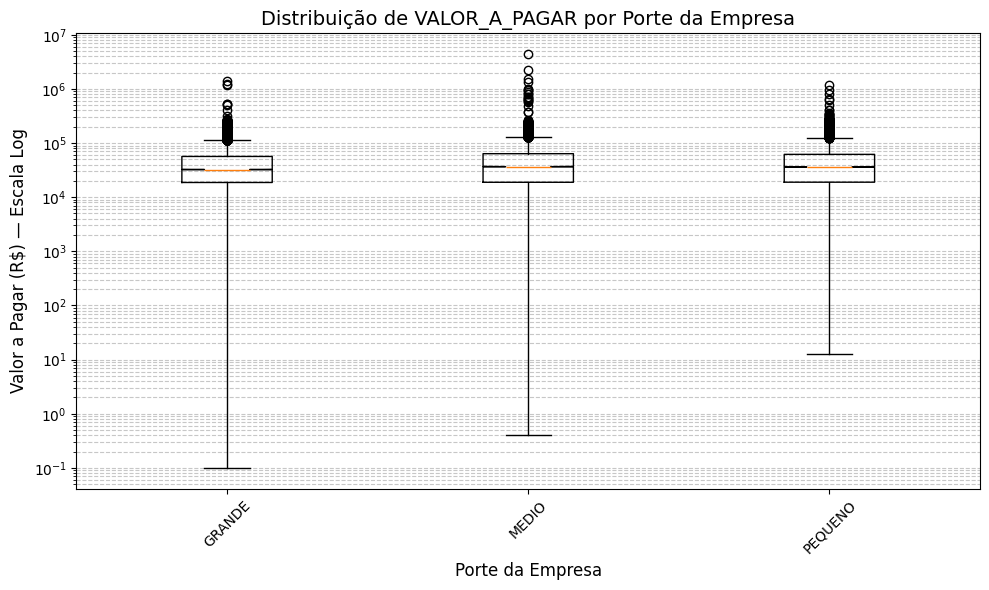

In [496]:

df_clean = merged_dataset.dropna(subset=['VALOR_A_PAGAR', 'PORTE'])

# Prepara agrupamento por porte
categories = sorted(df_clean['PORTE'].unique())
groups = [df_clean.loc[df_clean['PORTE'] == cat, 'VALOR_A_PAGAR'] for cat in categories]

# Plota boxplot com escala log no eixo Y
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    groups,
    labels=categories,
    notch=True,
    whis=1.5,
    showfliers=True
)

# 5) Ajustes estéticos
ax.set_title('Distribuição de VALOR_A_PAGAR por Porte da Empresa', fontsize=14)
ax.set_xlabel('Porte da Empresa', fontsize=12)
ax.set_ylabel('Valor a Pagar (R$) — Escala Log', fontsize=12)
ax.set_yscale('log')  # utiliza escala logarítmica para ampliar o corpo das caixas
ax.grid(axis='y', which='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existem muitos possíveis outliers em **VALOR_A_PAGAR** . Sendo assim, a substituição de valores faltantes de **VALOR_A_PAGAR** vai se dar pela mediana calculada de outros valores a pagar do mesmo cliente, contornando esses possíveis outliers. 

In [497]:
merged_dataset = merged_dataset.groupby('ID_CLIENTE').apply(
    lambda x: x.assign(
        VALOR_A_PAGAR=x['VALOR_A_PAGAR'].fillna(x['VALOR_A_PAGAR'].median())
    )
).reset_index(drop=True)

/home/matheus/default-risk-analysis/dra-env/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_13149/1455254207.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_dataset = merged_dataset.groupby('ID_CLIENTE').apply(


Verficando se ainda existem valores nulos 

In [498]:
merged_dataset[merged_dataset['VALOR_A_PAGAR'].isnull()]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIAS_ATRASO,TARGET_INADIMPLENCIA
14508,1557917925035542527,2021-05-01,2021-05-17,2021-06-22,2021-06-22,NaN,5.99,NaN,<NA>,2021-04-29,0,Comércio,YAHOO,PEQUENO,77,0,0


Verificando que ele ficou nulo justamente porque o cliente só possui esse único registro na base de dados. Ele será deletado postereriormente porque possui outro missing value e é um registro pertencente a classe 0, que é a classe com mais amostras na base de dados correspondente aos não inadimplentes

In [499]:
merged_dataset[merged_dataset['ID_CLIENTE']==1557917925035542527]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIAS_ATRASO,TARGET_INADIMPLENCIA
14508,1557917925035542527,2021-05-01,2021-05-17,2021-06-22,2021-06-22,NaN,5.99,NaN,<NA>,2021-04-29,0,Comércio,YAHOO,PEQUENO,77,0,0


Contando registros que possuem pelo menos 2 colunas com valores vazios e que fazem parte da classe 0, correspondente aos adimplentes. 

In [500]:
# Conta quantos valores ausentes existem por linha
missing_counts = merged_dataset.isna().sum(axis=1)

# Filtra registros com pelo menos 2 valores ausentes e classe 0
filtro = (missing_counts >= 2) & (merged_dataset['TARGET_INADIMPLENCIA'] == 0)

# Canculando percentual 
percentual_a_deletar = filtro.sum() * 100 / len(merged_dataset)

percentual_a_deletar

np.float64(4.674925400126594)

Deletando todos os registros do filtro 

In [501]:
# Remove os registros que satisfazem o filtro
merged_dataset = merged_dataset[~filtro].reset_index(drop=True)

In [502]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73794 entries, 0 to 73793
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              73794 non-null  int64         
 1   SAFRA_REF               73794 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  73794 non-null  datetime64[ns]
 3   DATA_PAGAMENTO          73794 non-null  datetime64[ns]
 4   DATA_VENCIMENTO         73794 non-null  datetime64[ns]
 5   VALOR_A_PAGAR           73794 non-null  float64       
 6   TAXA                    73794 non-null  float64       
 7   RENDA_MES_ANTERIOR      73475 non-null  float64       
 8   NO_FUNCIONARIOS         73474 non-null  Int64         
 9   DATA_CADASTRO           73794 non-null  datetime64[ns]
 10  FLAG_PF                 73794 non-null  int64         
 11  SEGMENTO_INDUSTRIAL     72490 non-null  object        
 12  DOMINIO_EMAIL           73794 non-null  object

In [503]:
merged_dataset.isnull().sum()


ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR                0
TAXA                         0
RENDA_MES_ANTERIOR         319
NO_FUNCIONARIOS            320
DATA_CADASTRO                0
FLAG_PF                      0
SEGMENTO_INDUSTRIAL       1304
DOMINIO_EMAIL                0
PORTE                     2389
CEP_2_DIG                    0
DIAS_ATRASO                  0
TARGET_INADIMPLENCIA         0
dtype: int64

Imputação guiada pelo contexto de valores em **PORTE**

In [504]:
# Colunas que definem os grupos com características semelhantes
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    'TAXA',
    'CEP_2_DIG',
]

# Função que preenche os valores nulos de 'PORTE' com a moda do grupo
def preencher_porte_com_moda(grupo):
    moda_porte = grupo['PORTE'].mode()
    
    # Verifica se há uma moda (pode não haver se o grupo for todo nulo)
    if not moda_porte.empty:
        # Preenche os nulos com a moda encontrada
        grupo['PORTE'] = grupo['PORTE'].fillna(moda_porte[0])
    
    return grupo

# Aplica a função a cada grupo do DataFrame
merged_dataset_temp = (
    merged_dataset
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_porte_com_moda)
)

/tmp/ipykernel_13149/504359981.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_porte_com_moda)


In [505]:
merged_dataset_temp.isnull().sum()

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_PAGAMENTO              0
DATA_VENCIMENTO             0
VALOR_A_PAGAR               0
TAXA                        0
RENDA_MES_ANTERIOR        308
NO_FUNCIONARIOS           309
DATA_CADASTRO               0
FLAG_PF                     0
SEGMENTO_INDUSTRIAL         0
DOMINIO_EMAIL               0
PORTE                     107
CEP_2_DIG                   0
DIAS_ATRASO                 0
TARGET_INADIMPLENCIA        0
dtype: int64

In [506]:
# Colunas que definem os grupos com características semelhantes
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    'TAXA',
]

# Função que preenche os valores nulos de 'PORTE' com a moda do grupo
def preencher_porte_com_moda(grupo):
    moda_porte = grupo['PORTE'].mode()
    
    # Verifica se há uma moda (pode não haver se o grupo for todo nulo)
    if not moda_porte.empty:
        # Preenche os nulos com a moda encontrada
        grupo['PORTE'] = grupo['PORTE'].fillna(moda_porte[0])
    
    return grupo

# Aplica a função a cada grupo do DataFrame
merged_dataset_temp = (
    merged_dataset_temp
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_porte_com_moda)
)

/tmp/ipykernel_13149/907983181.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_porte_com_moda)


Todas os valores faltantes de **PORTE** forma imputados 

In [507]:
merged_dataset_temp['PORTE'].isnull().sum()

np.int64(0)

Comparando os 2 datasets para certificar se as mudanças foram aplicadas corretamente

In [508]:
s1 = merged_dataset['PORTE']
s2 = merged_dataset_temp['PORTE']

# escolhe o índice comum (interseção)
idx_comum = s1.index.intersection(s2.index)

# compara só nas posições que existem em ambos
resultado = s1.loc[idx_comum].compare(s2.loc[idx_comum])

In [509]:
merged_dataset_temp.isnull().sum()

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_PAGAMENTO              0
DATA_VENCIMENTO             0
VALOR_A_PAGAR               0
TAXA                        0
RENDA_MES_ANTERIOR        308
NO_FUNCIONARIOS           309
DATA_CADASTRO               0
FLAG_PF                     0
SEGMENTO_INDUSTRIAL         0
DOMINIO_EMAIL               0
PORTE                       0
CEP_2_DIG                   0
DIAS_ATRASO                 0
TARGET_INADIMPLENCIA        0
dtype: int64

In [510]:
# Atualizando o df principal com os dados do df temporário 
merged_dataset = merged_dataset_temp.copy()

Verificando a quantidade de valores da classe não inadimplente:

In [511]:
# Conta quantos valores ausentes existem por linha
missing_counts = merged_dataset.isna().sum(axis=1)

# Filtra registros com pelo menos 2 valores ausentes e classe 0
filtro = (missing_counts >= 1) & (merged_dataset['TARGET_INADIMPLENCIA'] == 0)

filtro.sum() 


np.int64(0)

Verificando a quantidade de valores faltantes da classe inadimplente:

In [512]:
# Conta quantos valores ausentes existem por linha
missing_counts = merged_dataset.isna().sum(axis=1)

# Filtra registros com pelo menos 2 valores ausentes e classe 0
filtro = (missing_counts >= 1) & (merged_dataset['TARGET_INADIMPLENCIA'] == 1)

filtro.sum() 

np.int64(309)

Como são registros da classe Inadimplente que já estão em menor número no banco de dados, deletá-los pode não ser uma boa estratégia já que os dados estão muito desbalanceados

In [513]:
merged_dataset_temp[merged_dataset_temp['RENDA_MES_ANTERIOR'].isnull()]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIAS_ATRASO,TARGET_INADIMPLENCIA
309,43266641219008038,2020-02-01,2020-02-24,2020-06-24,2020-06-01,180.00,4.99,NaN,<NA>,2020-02-17,0,Serviços,GMAIL,GRANDE,36,23,1
310,43266641219008038,2020-02-01,2020-02-25,2020-06-22,2020-06-01,31300.00,4.99,NaN,<NA>,2020-02-17,0,Serviços,GMAIL,GRANDE,36,21,1
416,69766362497027920,2020-02-01,2020-02-27,2020-04-15,2020-04-03,12564.50,4.99,NaN,<NA>,2009-09-21,0,Serviços,HOTMAIL,MEDIO,69,12,1
417,69766362497027920,2020-02-01,2020-02-27,2020-04-15,2020-04-03,15064.50,4.99,NaN,<NA>,2009-09-21,0,Serviços,HOTMAIL,MEDIO,69,12,1
422,69766362497027920,2020-05-01,2020-05-28,2020-08-28,2020-07-06,552.84,5.99,NaN,<NA>,2009-09-21,0,Serviços,HOTMAIL,MEDIO,69,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73211,9036329217885149501,2020-05-01,2020-05-28,2020-07-31,2020-07-06,1571.89,5.99,NaN,<NA>,2018-09-30,0,Comércio,OUTROS,MEDIO,12,25,1
73294,9086764557051796364,2019-01-01,2019-01-29,2019-04-11,2019-03-15,1700.00,8.99,NaN,<NA>,2017-08-17,0,Indústria,GMAIL,MEDIO,75,27,1
73297,9089047150245738873,2020-10-01,2020-10-28,2020-11-18,2020-11-12,960.00,6.99,NaN,<NA>,2019-09-18,0,Indústria,HOTMAIL,MEDIO,61,6,1
73358,9099218788416728596,2021-04-01,2021-04-16,2021-05-25,2021-05-06,2106.09,6.99,NaN,<NA>,2021-04-12,0,Indústria,GMAIL,MEDIO,50,19,1


Fazendo agrupamento a partir de várias características e realizando a substituição dos dados faltantes pela mediana, evitando os possíveis outliers

In [514]:
# Colunas que definem os grupos com características semelhantes
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    'TAXA',
    'CEP_2_DIG',
]

def preencher_renda_com_mediana(grupo):
    if grupo['RENDA_MES_ANTERIOR'].notnull().any():
        mediana_renda = grupo['RENDA_MES_ANTERIOR'].median()
        grupo['RENDA_MES_ANTERIOR'] = grupo['RENDA_MES_ANTERIOR'].fillna(mediana_renda)
    return grupo


# Aplica a função a cada grupo do DataFrame
merged_dataset_temp = (
    merged_dataset_temp
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_renda_com_mediana)
)

/tmp/ipykernel_13149/3213236895.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_renda_com_mediana)


In [515]:
merged_dataset_temp.isnull().sum()

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_PAGAMENTO              0
DATA_VENCIMENTO             0
VALOR_A_PAGAR               0
TAXA                        0
RENDA_MES_ANTERIOR         58
NO_FUNCIONARIOS           309
DATA_CADASTRO               0
FLAG_PF                     0
SEGMENTO_INDUSTRIAL         0
DOMINIO_EMAIL               0
PORTE                       0
CEP_2_DIG                   0
DIAS_ATRASO                 0
TARGET_INADIMPLENCIA        0
dtype: int64

Aplicando o código novamente

In [516]:
# Colunas que definem os grupos com características semelhantes
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    'TAXA',
    #'CEP_2_DIG',
]

def preencher_renda_com_mediana(grupo):
    if grupo['RENDA_MES_ANTERIOR'].notnull().any():
        mediana_renda = grupo['RENDA_MES_ANTERIOR'].median()
        grupo['RENDA_MES_ANTERIOR'] = grupo['RENDA_MES_ANTERIOR'].fillna(mediana_renda)
    return grupo


# Aplica a função a cada grupo do DataFrame
merged_dataset_temp = (
    merged_dataset_temp
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_renda_com_mediana)
)

/tmp/ipykernel_13149/2734092270.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_renda_com_mediana)


In [517]:
merged_dataset_temp.isnull().sum()

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_PAGAMENTO              0
DATA_VENCIMENTO             0
VALOR_A_PAGAR               0
TAXA                        0
RENDA_MES_ANTERIOR          0
NO_FUNCIONARIOS           309
DATA_CADASTRO               0
FLAG_PF                     0
SEGMENTO_INDUSTRIAL         0
DOMINIO_EMAIL               0
PORTE                       0
CEP_2_DIG                   0
DIAS_ATRASO                 0
TARGET_INADIMPLENCIA        0
dtype: int64

Tratando **NO_FUNCIONARIOS** usando a mesma estratégia

In [518]:
# Colunas para agrupar
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    'TAXA',
    'CEP_2_DIG'
]

# Função para preencher NO_FUNCIONARIOS com a mediana arredondada
def preencher_funcionarios_com_mediana(grupo):
    if grupo['NO_FUNCIONARIOS'].notnull().any():
        mediana_func = grupo['NO_FUNCIONARIOS'].median()
        # Arredonda a mediana para o inteiro mais próximo
        mediana_func = int(round(mediana_func))
        grupo['NO_FUNCIONARIOS'] = grupo['NO_FUNCIONARIOS'].fillna(mediana_func)
    return grupo

# Aplica a função por grupo
merged_dataset_temp = (
    merged_dataset_temp
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_funcionarios_com_mediana)
)

/tmp/ipykernel_13149/1130909217.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_funcionarios_com_mediana)


In [519]:
merged_dataset_temp.isnull().sum()

ID_CLIENTE                 0
SAFRA_REF                  0
DATA_EMISSAO_DOCUMENTO     0
DATA_PAGAMENTO             0
DATA_VENCIMENTO            0
VALOR_A_PAGAR              0
TAXA                       0
RENDA_MES_ANTERIOR         0
NO_FUNCIONARIOS           58
DATA_CADASTRO              0
FLAG_PF                    0
SEGMENTO_INDUSTRIAL        0
DOMINIO_EMAIL              0
PORTE                      0
CEP_2_DIG                  0
DIAS_ATRASO                0
TARGET_INADIMPLENCIA       0
dtype: int64

In [520]:
# Colunas para agrupar
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    'CEP_2_DIG',
    #'TAXA',
    
]

# Função para preencher NO_FUNCIONARIOS com a mediana arredondada
def preencher_funcionarios_com_mediana(grupo):
    if grupo['NO_FUNCIONARIOS'].notnull().any():
        mediana_func = grupo['NO_FUNCIONARIOS'].median()
        # Arredonda a mediana para o inteiro mais próximo
        mediana_func = int(round(mediana_func))
        grupo['NO_FUNCIONARIOS'] = grupo['NO_FUNCIONARIOS'].fillna(mediana_func)
    return grupo

# Aplica a função por grupo
merged_dataset_temp = (
    merged_dataset_temp
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_funcionarios_com_mediana)
)

/tmp/ipykernel_13149/633008099.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_funcionarios_com_mediana)


In [521]:
# Colunas para agrupar
colunas_para_agrupamento = [
    'TARGET_INADIMPLENCIA',
    'SEGMENTO_INDUSTRIAL',
    #'CEP_2_DIG',
    'TAXA',
    
]

# Função para preencher NO_FUNCIONARIOS com a mediana arredondada
def preencher_funcionarios_com_mediana(grupo):
    if grupo['NO_FUNCIONARIOS'].notnull().any():
        mediana_func = grupo['NO_FUNCIONARIOS'].median()
        # Arredonda a mediana para o inteiro mais próximo
        mediana_func = int(round(mediana_func))
        grupo['NO_FUNCIONARIOS'] = grupo['NO_FUNCIONARIOS'].fillna(mediana_func)
    return grupo

# Aplica a função por grupo
merged_dataset_temp = (
    merged_dataset_temp
    .groupby(colunas_para_agrupamento, group_keys=False)
    .apply(preencher_funcionarios_com_mediana)
)

/tmp/ipykernel_13149/3316384753.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_funcionarios_com_mediana)


In [522]:
merged_dataset_temp.isnull().sum()

ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_PAGAMENTO            0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
RENDA_MES_ANTERIOR        0
NO_FUNCIONARIOS           0
DATA_CADASTRO             0
FLAG_PF                   0
SEGMENTO_INDUSTRIAL       0
DOMINIO_EMAIL             0
PORTE                     0
CEP_2_DIG                 0
DIAS_ATRASO               0
TARGET_INADIMPLENCIA      0
dtype: int64

Fazendo comparações e análises após as modificações 

In [523]:
s1 = merged_dataset['RENDA_MES_ANTERIOR']
s2 = merged_dataset_temp['RENDA_MES_ANTERIOR']

# escolhe o índice comum (interseção)
idx_comum = s1.index.intersection(s2.index)

# compara só nas posições que existem em ambos
resultado = s1.loc[idx_comum].compare(s2.loc[idx_comum])
resultado

,self,other
309,NaN,63964.00
310,NaN,63964.00
416,NaN,190604.00
417,NaN,190604.00
422,NaN,412558.00
...,...,...
73211,NaN,164464.00
73294,NaN,46036.00
73297,NaN,93100.25
73358,NaN,187893.00


In [524]:
s1 = merged_dataset['NO_FUNCIONARIOS']
s2 = merged_dataset_temp['NO_FUNCIONARIOS']

# escolhe o índice comum (interseção)
idx_comum = s1.index.intersection(s2.index)

# compara só nas posições que existem em ambos
resultado = s1.loc[idx_comum].compare(s2.loc[idx_comum])
resultado

,self,other
309,<NA>,88
310,<NA>,88
416,<NA>,128
417,<NA>,128
422,<NA>,92
...,...,...
73211,<NA>,112
73294,<NA>,103
73297,<NA>,116
73358,<NA>,161


In [525]:
merged_dataset = merged_dataset_temp.copy()

A coluna **DIAS_ATRASO** possui valores negativos, que na verdade são os dias de adiantamento no pagamento. Criando nova coluna para adiantamento e zerando os valores negativos da coluna de atraso, talvez esta nova coluna possa ser útil na engenharia de features

In [527]:
# Cria nova coluna de adiantamento com os valores negativos convertidos para positivos
merged_dataset['DIAS_ADIANTAMENTO'] = merged_dataset['DIAS_ATRASO'].apply(lambda x: abs(x) if x < 0 else 0)

# Zera os valores negativos em DIAS_ATRASO (mantém apenas atrasos reais)
merged_dataset['DIAS_ATRASO'] = merged_dataset['DIAS_ATRASO'].apply(lambda x: x if x > 0 else 0)


Analisando algumas distribuição de valores

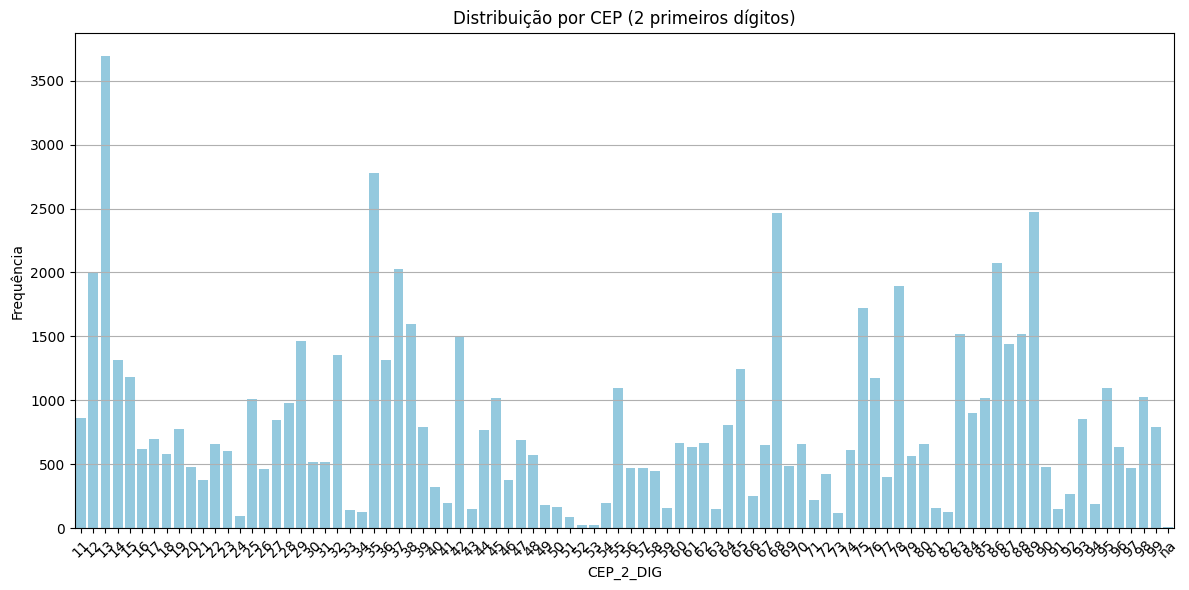

In [529]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_dataset, x='CEP_2_DIG', order=merged_dataset['CEP_2_DIG'].value_counts().sort_index().index, color='skyblue')
plt.title('Distribuição por CEP (2 primeiros dígitos)')
plt.xlabel('CEP_2_DIG')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [535]:
merged_dataset[merged_dataset['CEP_2_DIG']=='na']

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIAS_ATRASO,TARGET_INADIMPLENCIA,DIAS_ADIANTAMENTO
28828,3903290047715748290,2019-11-01,2019-11-24,2020-01-29,2020-01-16,95400.0,5.99,179419.0,116,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,13,1,0
28829,3903290047715748290,2019-11-01,2019-11-24,2020-01-30,2020-01-16,111300.0,5.99,179419.0,116,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,14,1,0
28830,3903290047715748290,2019-11-01,2019-11-24,2020-01-29,2020-01-16,111300.0,5.99,179419.0,116,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,13,1,0
28831,3903290047715748290,2020-09-01,2020-09-10,2020-12-04,2020-11-24,647562.5,6.99,13856.0,117,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,10,1,0
28832,3903290047715748290,2020-12-01,2020-12-06,2021-02-25,2021-02-19,14291.5,11.99,158720.0,111,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,6,1,0
28833,3903290047715748290,2021-01-01,2021-01-31,2021-04-27,2021-04-16,97479.0,6.99,13856.0,117,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,11,1,0
28834,3903290047715748290,2021-06-01,2021-06-11,2021-09-03,2021-08-25,136101.0,4.99,91492.0,115,2019-10-07,0,Indústria,HOTMAIL,PEQUENO,na,9,1,0


In [532]:
# persistindo o dataset mesclado 
merged_dataset.to_csv('../data/processed/merged_dataset.csv', index=False)

## Compilado das observações

### base_cadastral:

- Muitos registros vazios em **FLAG_PF**. Esses registros vazios, como visto no enunciado do case, indicam os clientes pessoa jurídica. Realizado o tratamento para melhor categorizar quem é pessoa física e quem é pessoa jurídica.
- **DDD** é uma variável geográfica, assim como **CEP_2_DIG**. Mas diferente de **DDD**, **CEP_2_DIG** não possui nenhum valor faltante. **DDD** será eliminada, pois os dois primeiros dígitos do CEP indicam a região posta e geralmente coincide com a área de abrangência de um **DDD**.
- A relação entre o **DOMINIO_EMAIL** e a variável target será analisada mais adiante, após a construção da variável alvo e a junção das tabelas. Por enquanto, observa-se que todos os domínios presentes são públicos. Apesar de ser possível que domínios corporativos apresentassem algum padrão diferente de inadimplência, isso não se aplica neste caso, já que não há registros com esse tipo de domínio.
- **CEP_2_DIG** pode influenciar na inadimplência. É uma variável geográfica e condições socioecômicas variam bastante pelo Brasil e condições socieconômicas influenciam na inadimplência. Essa correlação de dever ser avaliada com a variável TARGET.
- O tratamento dos valores nulos das seguintes colunas: **SEGMENTO_INDUSTRIAL** (moda), **PORTE** (moda) será analisado quando as tabelas estiverem mescladas.
- **ID_CLIENTE**: será usado para o merge das tabelas e depois será removido.
- Nenhuma duplicata encontrada.


### base_info:
- **SAFRA_REF**: conversão para datetime do pandas, agrupando registros por **ID_CLIENTE** e ordenando esses registros por **SAFRA_REF**.
- **RENDA_MES_ANTERIOR**: tratamento de vazios com interpolação linear pois trata-se de uma série temporaral, tentar estimar os valores a partir dos valores anteriores e posteriores é uma boa estratégia neste caso. Os valores das "bordas" foram preenchidos usando a técnica de backward fill e forward fill. 11 casos são casos únicos em que não é possível estimar os valores por cliente. Além disso, esses casos específicos não possuem valores em **NO_FUNCIONARIOS**. Sendo assim, são bons candidatos a deleção.
- A variável **NO_FUNCIONARIOS** possui muitos valores ausentes e representa um dado discreto. Como o número de funcionários costuma se manter estável ao longo do tempo, foi aplicada inicialmente a interpolação linear dentro de cada cliente para estimar os valores faltantes. Para os casos em que a interpolação não foi suficiente, como nas extremidades da série temporal, foi utilizado o preenchimento com forward fill e backward fill para completar os dados de forma mais coerente. Não foi possível aplicar essa técnica em 11 casos. A deleção desses registros será analisada.
- Nenhuma duplicata encontrada


### base_pagamentos_desenvolvimento:
- **VALOR_A_PAGAR**: a decisão de como tratar esses valores será feita na base mesclada.
- Registro duplicado foi resolvido (somente o primeiro foi mantido)
- Conversão de colunas de datas para datetime

### base_pagamentos_teste:
- **VALOR_A_PAGAR**: a decisão de como tratar esses valores será feita na base mesclada
- Registros duplicados foram resolvidos (somente o primeiro foi mantido)
- Conversão de colunas de datas para datetime

### base_pagamentos_desenvolvimento X base_pagamentos_teste:

- 88 clientes estão na base de teste mas não estão na base de desenvolvimento. Será necessário lidar com eles para as inferências

### base_pagamentos_desenvolvimento X base_cadastral X base_info (base mesclada):
- A análise do domínio de e-mail mostra variações relevantes na taxa de inadimplência entre os usuários. O domínio **HOTMAIL** apresenta a maior taxa (9,26%) entre os principais provedores, seguido por **GMAIL** (7,4%) e **BOL** (7,3%). Já os domínios **YAHOO**, **OUTLOOK** e **AOL** apresentam taxas progressivamente menores, sendo a menor observada em **AOL** (3,9%). Como todas essas categorias possuem uma quantidade significativa de registros, a variável **DOMINIO_EMAIL** pode contribuir com valor preditivo e merece ser considerada no modelo, desde que tratada adequadamente. Visando evitar overfitting já que essa categoria está bem desbalanceada, **BOL**, **OUTLOOK**, **AOL** e valores vazios serão agrupados como **OUTROS**.
- **VALOR_A_PAGAR**: substituição pela mediana, evitando possíveis outliers. A mediana foi calculada agrupando os registros por cliente
- Registros deletados: somente os registros que pertencem a classe de adimplentes e que têm 2 ou mais de seus valores vazios depois de todos os tratamentos já feitos até então. A quantidade de registros deletados formam somente 4.67 % da quantidade de registros totais, estando dentro da faixa de 5%.
- Imputação de valores para **PORTE**: para pegar a moda, foi considerado os registros que estão na mesma classe (inadimplente ou não), o mesmo segmento industrial, a mesma taxa de juros, o mesmo CEP_2_DIG, ou seja, características similares.
- Valores de **RENDA_MES_ANTERIOR** foram imputados com a mediana considerando agrupamento de TARGET_INADIMPLENCIA, SEGMENTO_INDUSTRIAL, TAXA e CEP_2_DIG
- Valores de **NO_FUNCIONARIOS** foram imputados com a mediana considerando agrupamento de TARGET_INADIMPLENCIA, SEGMENTO_INDUSTRIAL, TAXA e CEP_2_DIG
- **TAXA**: plotando boxplot foi identificado alguns outliers. Apesar das taxas mais altas, elas parecem ser factíveis